# Data Source & Usage Notice

This notebook uses data derived from the **COSMIC database (Catalogue Of Somatic Mutations In Cancer)**, developed and owned by the Wellcome Sanger Institute.

All data used here is strictly for **academic and non-commercial research purposes only**, in compliance with COSMIC's licensing terms.

No raw data from COSMIC is redistributed in this notebook. Only **derived metrics, visualizations, and aggregated summaries** are shown. For full access, users must register at: https://cancer.sanger.ac.uk/cosmic

**Version used**:COSMIC v101

If this notebook is shared or cited, please include this disclaimer and do not expose any raw COSMIC files.


# Importing Libraries
For this project will be used:
- Pandas;
- Numpy;
- Matplotlib.




 # Data Loading


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/CarolPacifico0/Leukemia_Project/main/Mutations/data/Mutations%20Leukemia.csv'
mutations_df = pd.read_csv(url)

# Show shape and first rows
print("Dataset shape:", mutations_df.shape)
mutations_df.head()

Dataset shape: (831838, 4)


,Gene Name,Sample Name,CDS Mutation,AA Mutation
0,A1CF,SNUH_G17_S1,c.1704C>G,p.L568=
1,A1CF,SNUH_G64_S1,c.628+187T>C,p.?
2,A1CF,Pros_WES_01_DX,c.891+205T>C,p.?
3,A1CF,AML14,c.628+2280G>T,p.?
4,A1CF,AML1,c.*4199A>G,p.?


###Connect to Google Drive and Set the Working Folder





In [ ]:
from google.colab import drive
import os
from IPython.display import display
import ipywidgets as widgets


# Mount Google Drive
drive.mount('/content/drive')


# Create a text input widget with a longer line
folder_input = widgets.Text(
    value='',
    placeholder='Enter the name of the folder you created',
    description='Folder:',
    layout=widgets.Layout(width='50%')
)


# Display the widget
display(folder_input)


# Function to change directory based on user input
def change_directory(change):
    folder_name = change['new']
    os.chdir(f'/content/drive/MyDrive/{folder_name}')
    print(f"Current directory: {os.getcwd()}")


# Link the widget to the function
folder_input.observe(change_directory, names='value')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(value='', description='Folder:', layout=Layout(width='50%'), placeholder='Enter the name of the folder yo…

Current directory: /content/drive/MyDrive/Leukemia_Project


In [ ]:
url = 'https://raw.githubusercontent.com/CarolPacifico0/Leukemia_Project/main/Mutations/data/Mutations%20Leukemia.csv'
df_preview = pd.read_csv(url, nrows=5)

print("Detected columns:", df_preview.columns.tolist())

df_preview

Detected columns: ['Gene Name', 'Sample Name', 'CDS Mutation', 'AA Mutation']


,Gene Name,Sample Name,CDS Mutation,AA Mutation
0,A1CF,SNUH_G17_S1,c.1704C>G,p.L568=
1,A1CF,SNUH_G64_S1,c.628+187T>C,p.?
2,A1CF,Pros_WES_01_DX,c.891+205T>C,p.?
3,A1CF,AML14,c.628+2280G>T,p.?
4,A1CF,AML1,c.*4199A>G,p.?


In [ ]:
# Show all columns in output
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Show top rows as a full-width table
df.head(20)  # Adjust the number of rows if needed

,Gene Name,Sample Name,CDS Mutation,AA Mutation
0,Gene Name,Sample Name,CDS Mutation,AA Mutation
1,A1CF,SNUH_G17_S1,c.1704C>G,p.L568=
2,A1CF,SNUH_G64_S1,c.628+187T>C,p.?
3,A1CF,Pros_WES_01_DX,c.891+205T>C,p.?
4,A1CF,AML14,c.628+2280G>T,p.?
5,A1CF,AML1,c.*4199A>G,p.?
6,A1CF,933124,c.*4199A>G,p.?
7,A1CF,SNUH_G16_S1,c.1290C>T,p.L430=
8,A1CF,2014_SWES_13_DX,c.1704C>G,p.L568=
9,A1CF,SNU_WGS_11_S1,c.793+778G>A,p.?


In [ ]:
#Checking if it was uploaded correctly
print("Number of rows, columns):", df.shape)


Number of rows, columns): (831839, 4)


#Data Cleaning

(Explanatory Note)

Although no missing values were found in this dataset, we applied a standard cleaning strategy to ensure robustness:
- Drop rows missing essential fields: 'Gene Name' and 'CDS Mutation'
- Fill all remaining missing values with 'NA'
- Remove duplicates and normalize column names (e.g., strip whitespace, uppercase genes)

This prepares the data for reuse and makes the notebook scalable for future datasets that may contain missing or inconsistent entries.


### Handling Missing Values

- For critical columns like 'Gene Name' and 'CDS Mutation', we drop rows with missing values;

- For non-critical annotations, we fill missing values with 'NA'.

This ensures we keep important data clean while retaining context where possible.

In [ ]:
# Missing values before cleaning
print(" Missing values before cleaning:")
print(mutations_df.isna().sum())

# Step 1: Drop rows missing essential columns
mutations_df.dropna(subset=['Gene Name', 'CDS Mutation'], inplace=True)

# Step 2: Fill non-critical missing values
mutations_df.fillna('NA', inplace=True)

# Missing values after cleaning
print("\n Missing values after cleaning:")
print(mutations_df.isna().sum())

 Missing values before cleaning:
Gene Name       0
Sample Name     0
CDS Mutation    0
AA Mutation     0
dtype: int64

 Missing values after cleaning:
Gene Name       0
Sample Name     0
CDS Mutation    0
AA Mutation     0
dtype: int64


### Before analyzing mutation frequencies and patterns, it is essential to ensure the dataset is clean and consistent. Data cleaning helps:

- Remove duplicate entries that could bias mutation counts
- Standardize gene names and formatting
- Ensure column labels are correctly parsed and uniform

By performing these steps, we improve the reliability of downstream analyses and visualizations.

In [ ]:
# Drop rows with missing essential mutation information
df = df.dropna(subset=['Gene Name', 'AA Mutation'])

# Remove duplicate records
df = df.drop_duplicates()

# Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Standardize gene names to uppercase using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Gene Name'] = df['Gene Name'].str.upper()

# Report final shape of the cleaned dataset
print("Data shape after cleaning:", df.shape)

# Display the first rows of the cleaned dataframe
df.head()


Data shape after cleaning: (830978, 4)


,Gene Name,Sample Name,CDS Mutation,AA Mutation
0,A1CF,SNUH_G17_S1,c.1704C>G,p.L568=
1,A1CF,SNUH_G64_S1,c.628+187T>C,p.?
2,A1CF,Pros_WES_01_DX,c.891+205T>C,p.?
3,A1CF,AML14,c.628+2280G>T,p.?
4,A1CF,AML1,c.*4199A>G,p.?


Data shape after removing invalid header row: (830978, 4)


,Gene Name,Sample Name,CDS Mutation,AA Mutation
0,A1CF,SNUH_G17_S1,c.1704C>G,p.L568=
1,A1CF,SNUH_G64_S1,c.628+187T>C,p.?
2,A1CF,Pros_WES_01_DX,c.891+205T>C,p.?
3,A1CF,AML14,c.628+2280G>T,p.?
4,A1CF,AML1,c.*4199A>G,p.?


 ### Data Cleaning Strategy (Explanatory Note)

Although no missing values were found in this dataset, we applied a standard cleaning strategy to ensure robustness:
- Drop rows missing essential fields: 'Gene Name' and 'CDS Mutation'
- Fill all remaining missing values with 'NA'
- Remove duplicates and normalize column names (e.g., strip whitespace, uppercase genes)

This prepares the data for reuse and makes the notebook scalable for future datasets that may contain missing or inconsistent entries.


# Data Processing

### The first step is to group mutations by gene to determine which genes are most frequently affected across samples.


In [ ]:
# Counting Mutations by Gene
mutation_counts = df['Gene Name'].value_counts().reset_index()
mutation_counts.columns = ['Gene', 'Mutation Count']
mutation_counts.head(10)  # the top 10 genes will be listed


,Gene,Mutation Count
0,JAK2,51922
1,FLT3,17662
2,NPM1,7187
3,CALR,4964
4,TET2,4145
5,NPM1_ENST00000517671,3994
6,NPM1_ENST00000351986,3994
7,DNMT3A,3718
8,TET2_ENST00000513237,3178
9,TET2_ENST00000380013,3178


####Why remove transcript IDs from gene names?

In the original dataset, some gene names include transcript identifiers (e.g., "NPM1_ENST00000517671"), which represent different isoforms of the same gene.

To avoid fragmenting the mutation counts and to get a more accurate overview of the most frequently mutated genes, we removed the transcript suffix. This allows us to group all mutations under the main gene symbol, making the results easier to interpret and compare.


In [ ]:
# Remove transcript IDs if present (anything after "_")
df['Clean Gene'] = df['Gene Name'].str.split('_').str[0]

# Group by cleaned gene name
gene_counts = df['Clean Gene'].value_counts().reset_index()
gene_counts.columns = ['Gene', 'Mutation Count']

# Show top 10
gene_counts.head(10)


,Gene,Mutation Count
0,JAK2,51922
1,FLT3,17662
2,TP53,17585
3,NPM1,15195
4,TET2,13401
5,DNMT3A,11861
6,ASXL1,11069
7,RUNX1,6390
8,WT1,6055
9,IDH2,4973


### Classifying mutation types

Classifying mutations based on their protein-level effect helps us understand their potential functional impact. For example:

- "Missense" mutations may change protein function,
- "Nonsense" mutations often lead to truncated proteins,
- "Synonymous" mutations do not alter the amino acid sequence,
- "Unknown" effects (e.g., intronic) require further interpretation.

This classification provides biological context and is useful for downstream prioritization and visualization.


In [ ]:
def classify_mutation(aa_change):
    if aa_change == "p.?":
        return "Unknown"
    elif "=" in aa_change:
        return "Synonymous"
    elif "*" in aa_change:
        return "Nonsense"
    elif "fs" in aa_change.lower():
        return "Frameshift"
    elif "del" in aa_change.lower():
        return "Deletion"
    elif "ins" in aa_change.lower():
        return "Insertion"
    else:
        return "Missense"

# Apply Classification
mutations_df['Mutation_Type'] = mutations_df['AA Mutation'].apply(classify_mutation)

# Counting by mutation type
mutation_type_counts = mutations_df['Mutation_Type'].value_counts().reset_index()
mutation_type_counts.columns = ['Mutation_Type', 'Count']
mutation_type_counts



,Mutation_Type,Count
0,Unknown,467808
1,Missense,224994
2,Nonsense,61520
3,Synonymous,61055
4,Insertion,13381
5,Deletion,3036
6,Frameshift,44


In [ ]:
mutation_type_counts = (
    mutations_df['Mutation_Type']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Type', 'Mutation_Type': 'Count'})
)


### Visualization

Visualizing mutation frequencies allows us to quickly identify the most commonly affected genes in the dataset. This is useful for prioritizing genes of interest, highlighting known cancer drivers, and exploring mutation patterns across samples. Bar plots are especially effective for comparing the top mutated genes side by side.


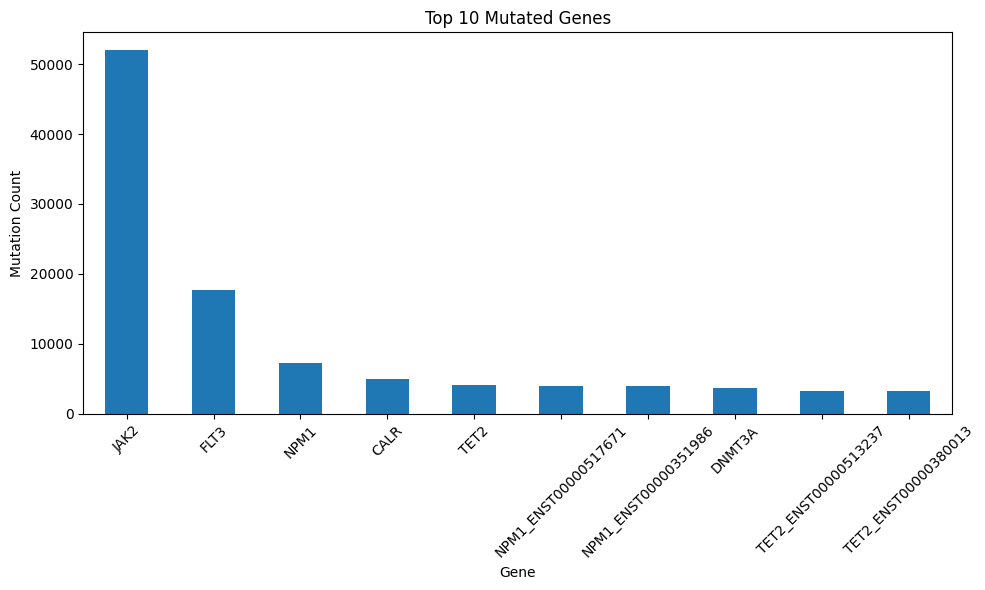

In [ ]:
#@title **Top 10 Mutated Genes**
import os
import matplotlib.pyplot as plt

# Create 'PLOTS' folder if it doesn't exist
if not os.path.exists('PLOTS'):
    os.makedirs('PLOTS')

top10_genes = mutations_df['Gene Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
top10_genes.plot(kind='bar')
plt.title('Top 10 Mutated Genes')
plt.xlabel('Gene')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save figure
plt.savefig('PLOTS/top10_mutated_genes.tiff', format='tiff', dpi=300, bbox_inches='tight')
plt.show()


#### Distribution of mutation type
Plotting the distribution of mutation types helps us understand the biological nature of the alterations in the dataset. For example, a high number of missense or nonsense mutations may suggest functional disruption, while synonymous mutations are typically neutral. This overview provides insights into the potential impact of the mutation landscape.


In [ ]:
mutation_type_counts = (
    mutations_df['Mutation_Type']
    .value_counts()
    .reset_index()
)
mutation_type_counts.columns = ['Mutation_Type', 'Count']

print(mutation_type_counts.head())


  Mutation_Type   Count
0       Unknown  467808
1      Missense  224994
2      Nonsense   61520
3    Synonymous   61055
4     Insertion   13381


In [ ]:
# Helper function to create PLOTS folder if needed
def ensure_plots_folder():
    if not os.path.exists('PLOTS'):
        os.makedirs('PLOTS')


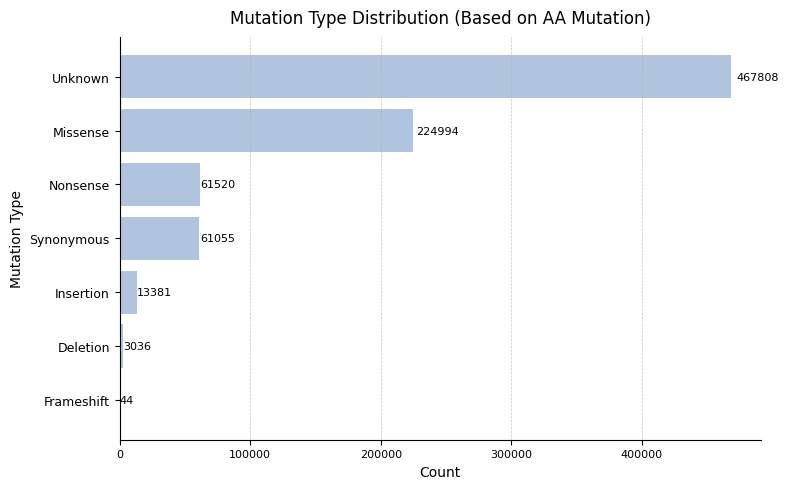

Plot saved at: /content/PLOTS/mutation_type_distribution_final.tiff


In [ ]:
#@title **Mutation Type Distribution**

ensure_plots_folder()

plt.figure(figsize=(8, 5))


bars = plt.barh(
    mutation_type_counts['Mutation_Type'],
    mutation_type_counts['Count'],
    color='lightsteelblue'
)


plt.xlabel("Count", fontsize=10)
plt.ylabel("Mutation Type", fontsize=10)
plt.title("Mutation Type Distribution (Based on AA Mutation)", fontsize=12, pad=10)


plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.gca().invert_yaxis()


for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)


for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', ha='left', fontsize=8)

plt.tight_layout()


plt.savefig('PLOTS/mutation_type_distribution_final.tiff', format='tiff', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {os.path.abspath('PLOTS/mutation_type_distribution_final.tiff')}")
